<a href="https://colab.research.google.com/github/Ahtesham-Ibne-Mostafa/Computer_Vision_and_Image_Processing/blob/main/CSE428_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

Max collaborators = 3

There is a bit of handholding. If you still do not understand something, feel free to reach out to your lab faculties. Good luck.

In [2]:
COLLABORATORS_NAME = "Ahtesham Ibne Mostafa"
COLLABORATORS_ID = "24241309"

# Part 1 [15 Marks]

In this part, you will work with point processing, HE, AHE, and CLAHE.

In [3]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
### If you need other dependencies import here -
from skimage import img_as_float
### Code ends

In [4]:
### If you need helper functions defined, define here -

### Code ends

## Task 1 - Basic Image Operation

Import any photograph taken by you (RGB) (`sample_1.jpeg`/`sample_1.jpg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

Remember - your image name MUST be `sample_1.jpeg`/`sample_1.jpg`.

Make sure the height and the width of the image is **smaller than 1000 pixels**.

In [5]:
I = io.imread("/content/ChatGPT Image Aug 5, 2025, 02_44_12 PM.png") # Replace None with appropriate import function call

# Normalize the image so that the pixel values of each channel are between 0 and 1
I = img_as_float(I)


# find the height and the width of the image
H = I.shape[0]  # should contain height
W = I.shape[1]  # should contain width
print("Height is", H)
print("Width is", W)

Height is 1024
Width is 1024


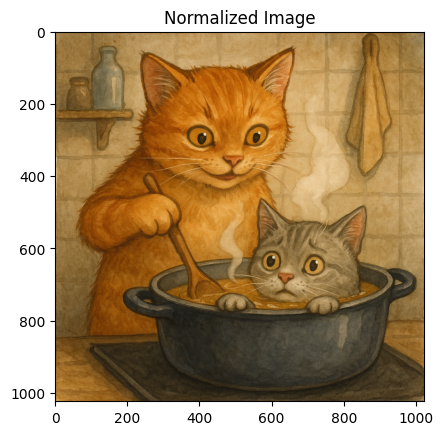

In [6]:
I = img_as_float(I) # Replace none and normalize the image so that the pixel values of each channel are between 0 and 1

### Write a code to display the image -
plt.imshow(I, cmap='gray', vmin=0, vmax=1)
plt.title("Normalized Image")
plt.show()
### Code ends

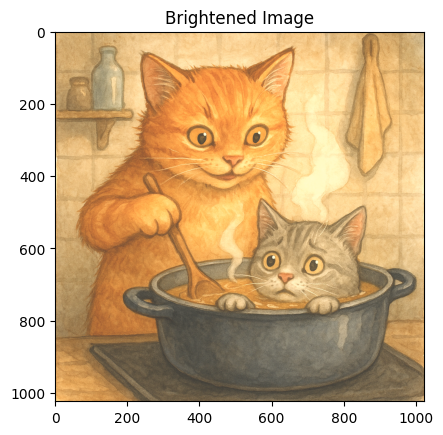

In [7]:
# Increase the brightness of the image without changing the contrast.
# Save the resulting image in I_bright.
I_bright = None

### Hint - You have to convert to LAB first

### Write a code to display the I_bright -
I_lab = color.rgb2lab(I)

L = I_lab[:, :, 0]
A = I_lab[:, :, 1]
B = I_lab[:, :, 2]

L_bright = np.clip(L + 20, 0, 100)

I_lab_bright = np.stack((L_bright, A, B), axis=2)

I_bright = color.lab2rgb(I_lab_bright)

plt.imshow(I_bright, cmap='gray', vmin=0, vmax=1)
plt.title("Brightened Image")
plt.show()

### Code ends

/tmp/ipython-input-1017011360.py:11: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 356 negative Z values that have been clipped to zero
  I_dark = color.lab2rgb(I_lab_dark)


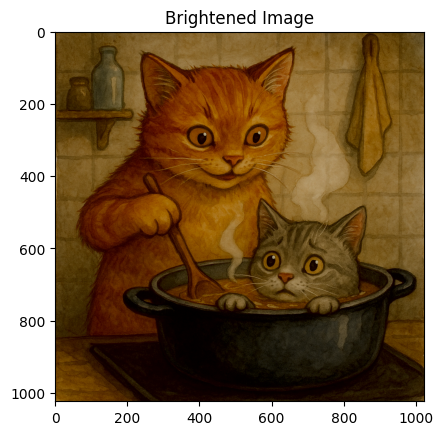

In [8]:
# Decrease the brightness of the image without changing the contrast.
# Save the resulting image in I_dark.
I_dark = None

### Write a code to display the I_bright -

L_dark = np.clip(L -20, 0, 100)

I_lab_dark = np.stack((L_dark, A, B), axis=2)

I_dark = color.lab2rgb(I_lab_dark)

plt.imshow(I_dark, cmap='gray', vmin=0, vmax=1)
plt.title("Brightened Image")
plt.show()

### Code ends

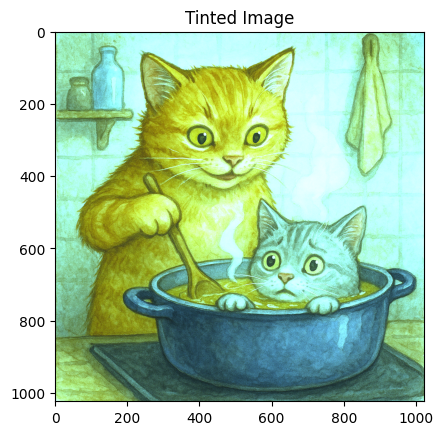

In [9]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = np.zeros(I.shape)

# HINT:
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### Write a code to display the I_tint -

I_tint[:, :, 0] = I[:, :, 0] * 1   # R
I_tint[:, :, 1] = I[:, :, 1] * 2   # G
I_tint[:, :, 2] = I[:, :, 2] * 3   # B


I_tint = np.clip(I_tint, 0, 1)

plt.imshow(I_tint, cmap='gray', vmin=0, vmax=1)
plt.title("Tinted Image")
plt.show()
### Code ends

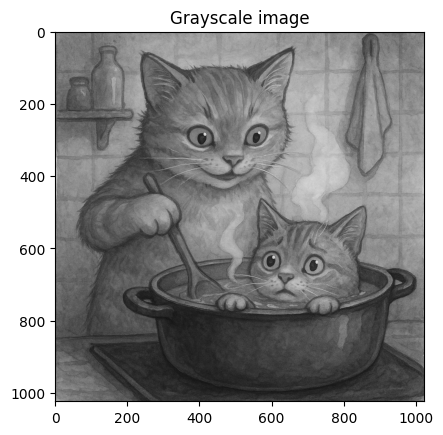

In [10]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = color.rgb2gray(I)

### Write a code to display the I_gray -
plt.imshow(I_gray, cmap='gray', vmin=0, vmax=1)
plt.title("Grayscale image")
plt.show()
### Code ends

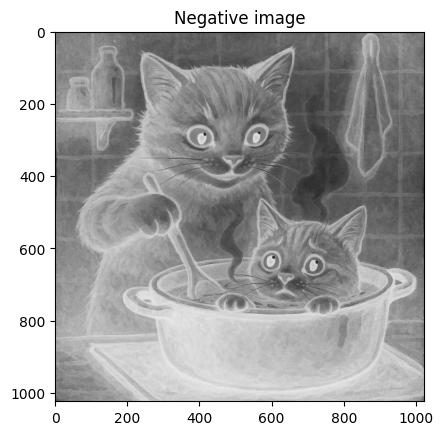

In [11]:
# Display the negative of the grayscale image
I_neg = 1- I_gray

### Write a code to display the I_neg -
plt.imshow(I_neg, cmap='gray', vmin=0, vmax=1)
plt.title("Negative image")
plt.show()
### Code ends

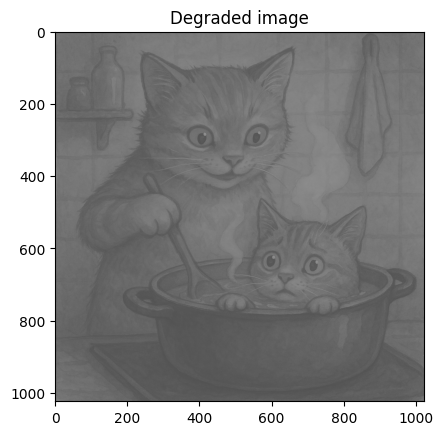

In [12]:
# This cell will artificially degrade your grayscale image by reducing contrast
# The max pixel value is mapped to 0.6 and the min pixel value is mapped to 0.3
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))

# Try to understand what is going on
# You will need to use this concept later on

### Write a code to display the I_degraded -
plt.imshow(I_degraded, cmap='gray', vmin=0, vmax=1)
plt.title("Degraded image")
plt.show()
### Code ends

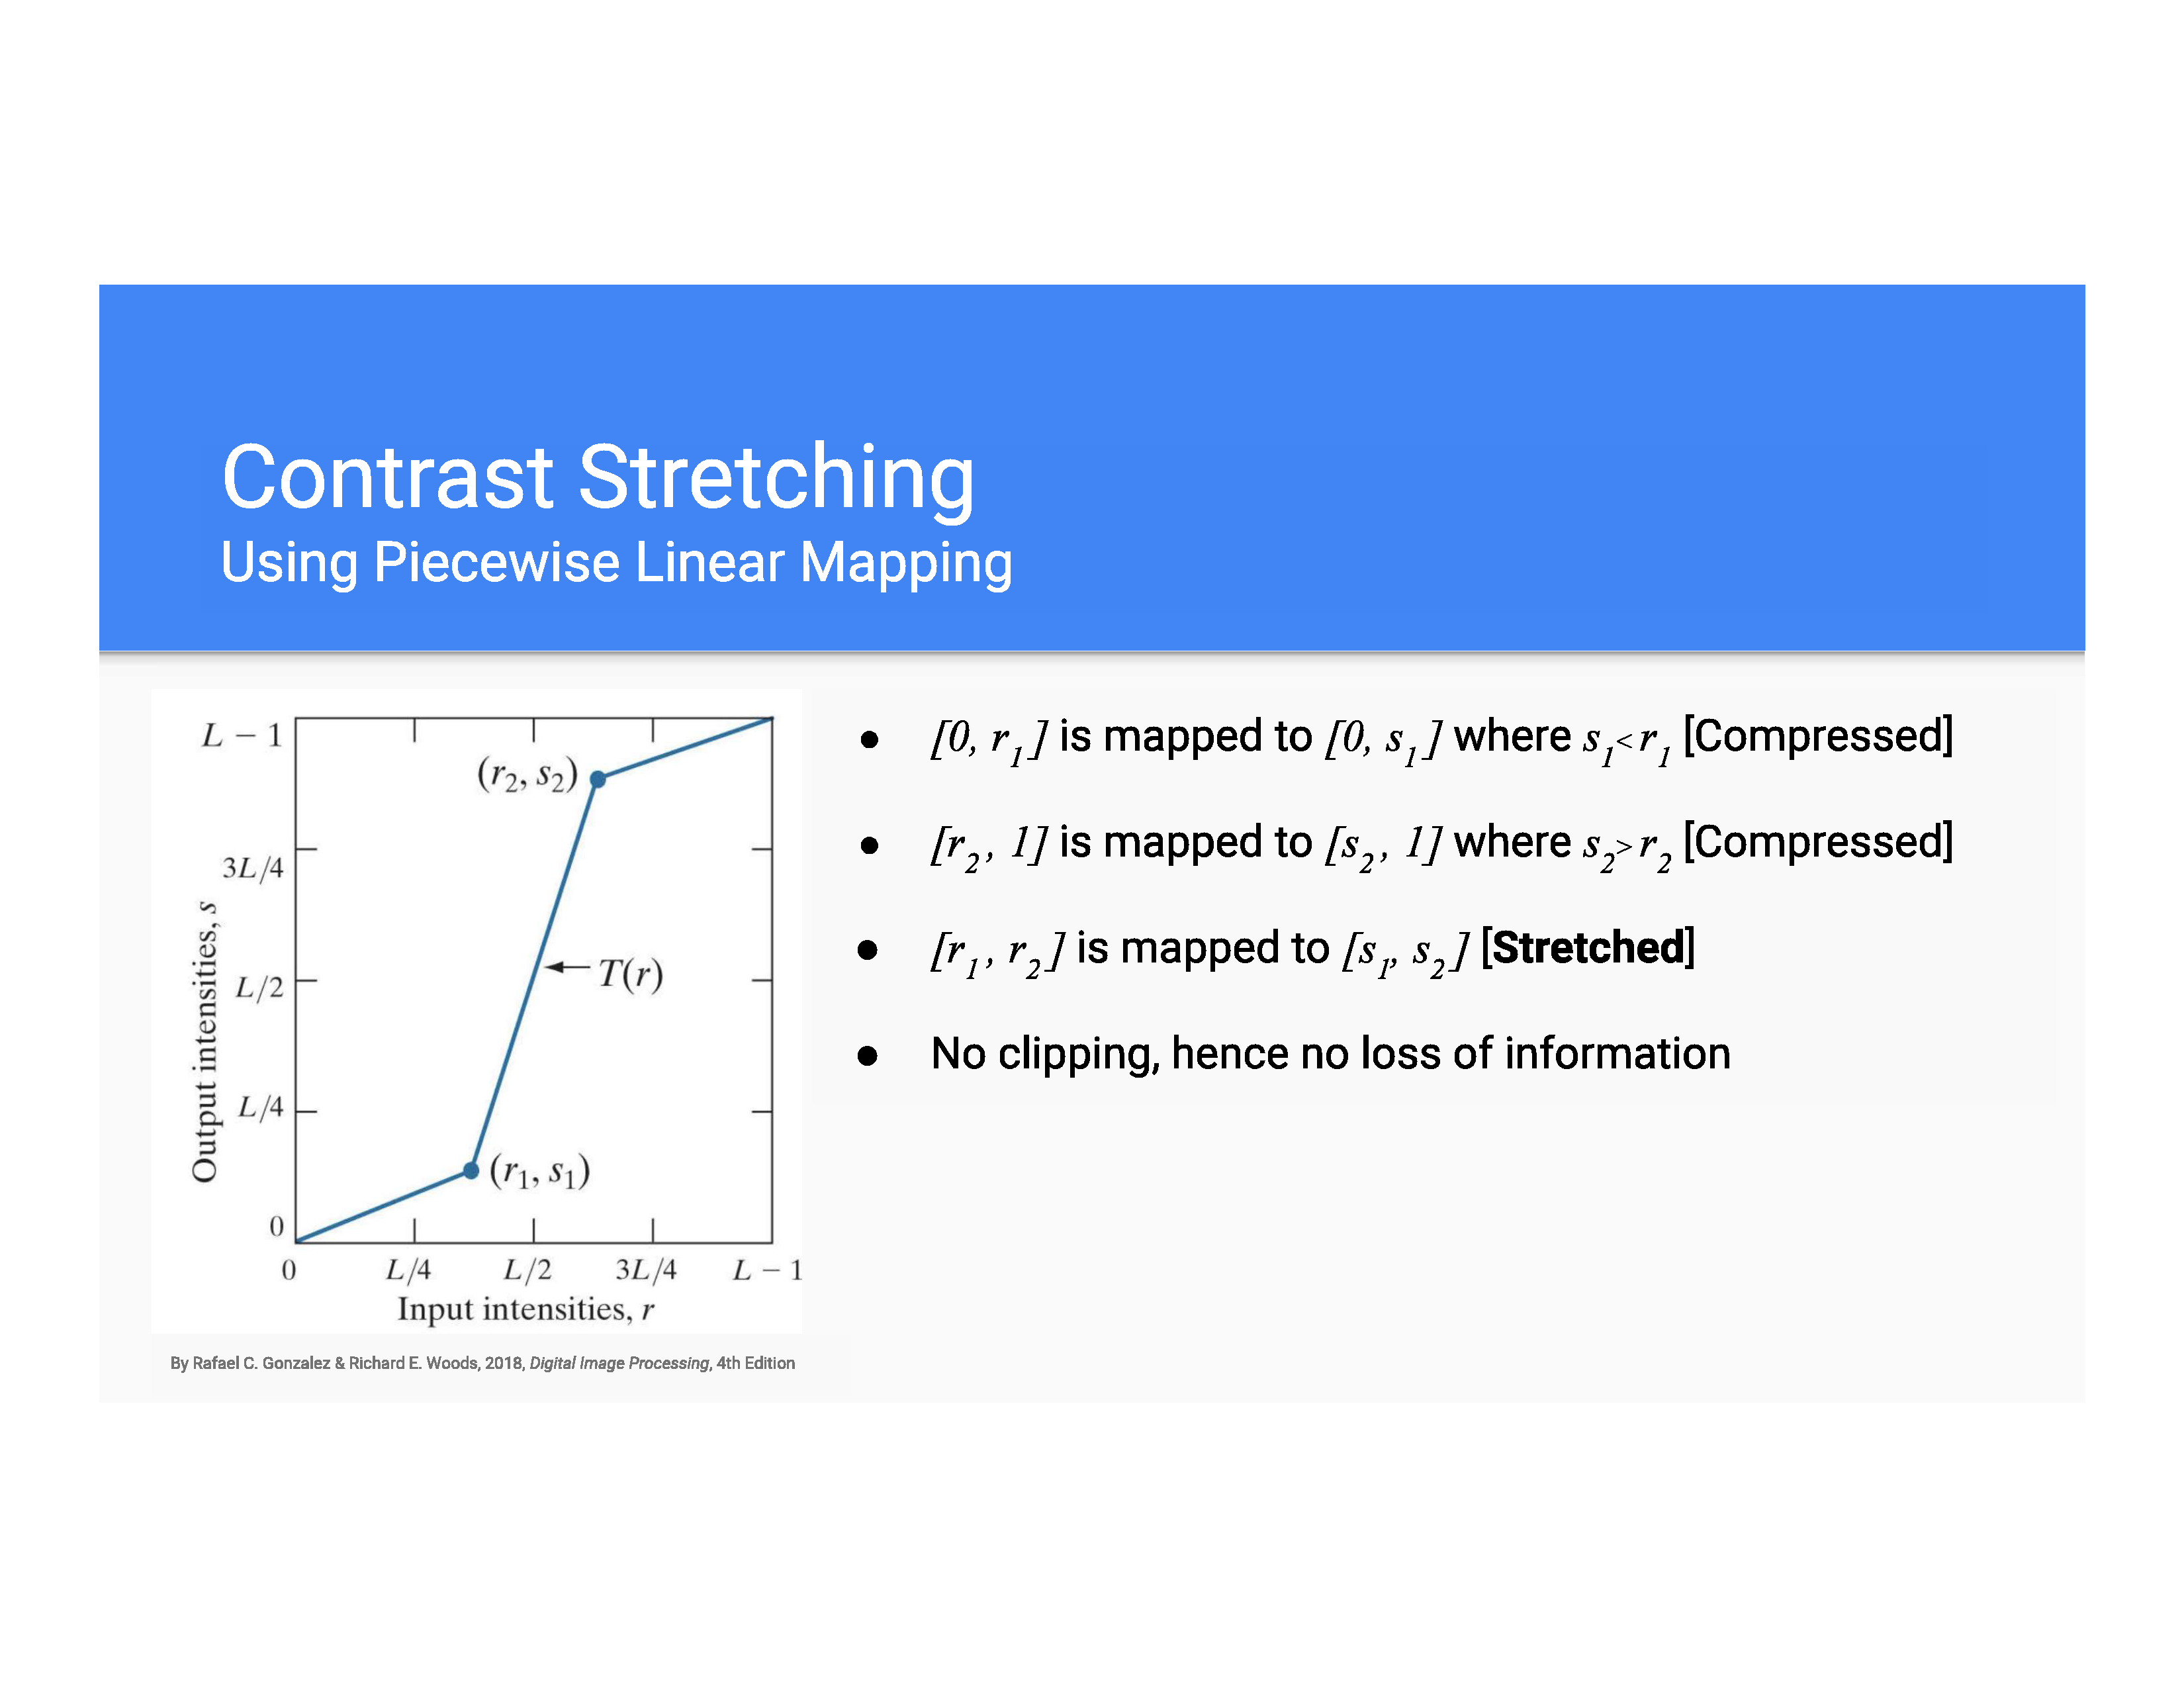

In [13]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in the picture above

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    I_stretched = np.zeros_like(I) # replace with appropriate code
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            r = I[i, j]
            if r <= r1:
                I_stretched[i, j] = (s1 / r1) * r
            elif r <= r2:
                I_stretched[i, j] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
            else:
                I_stretched[i, j] = ((1 - s2) / (1 - r2)) * (r - r2) + s2

    return I_stretched

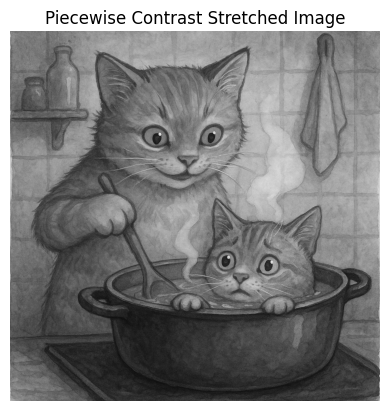

In [14]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = 0.3
r2 = 0.7
s1 = 0.1
s2 = 0.9
I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)

### Write a code to display the I_stretched -
plt.imshow(I_stretched, cmap='gray')
plt.title("Piecewise Contrast Stretched Image")
plt.axis('off')
plt.show()
### Code ends

## Task 2 - Histogram and Equalization

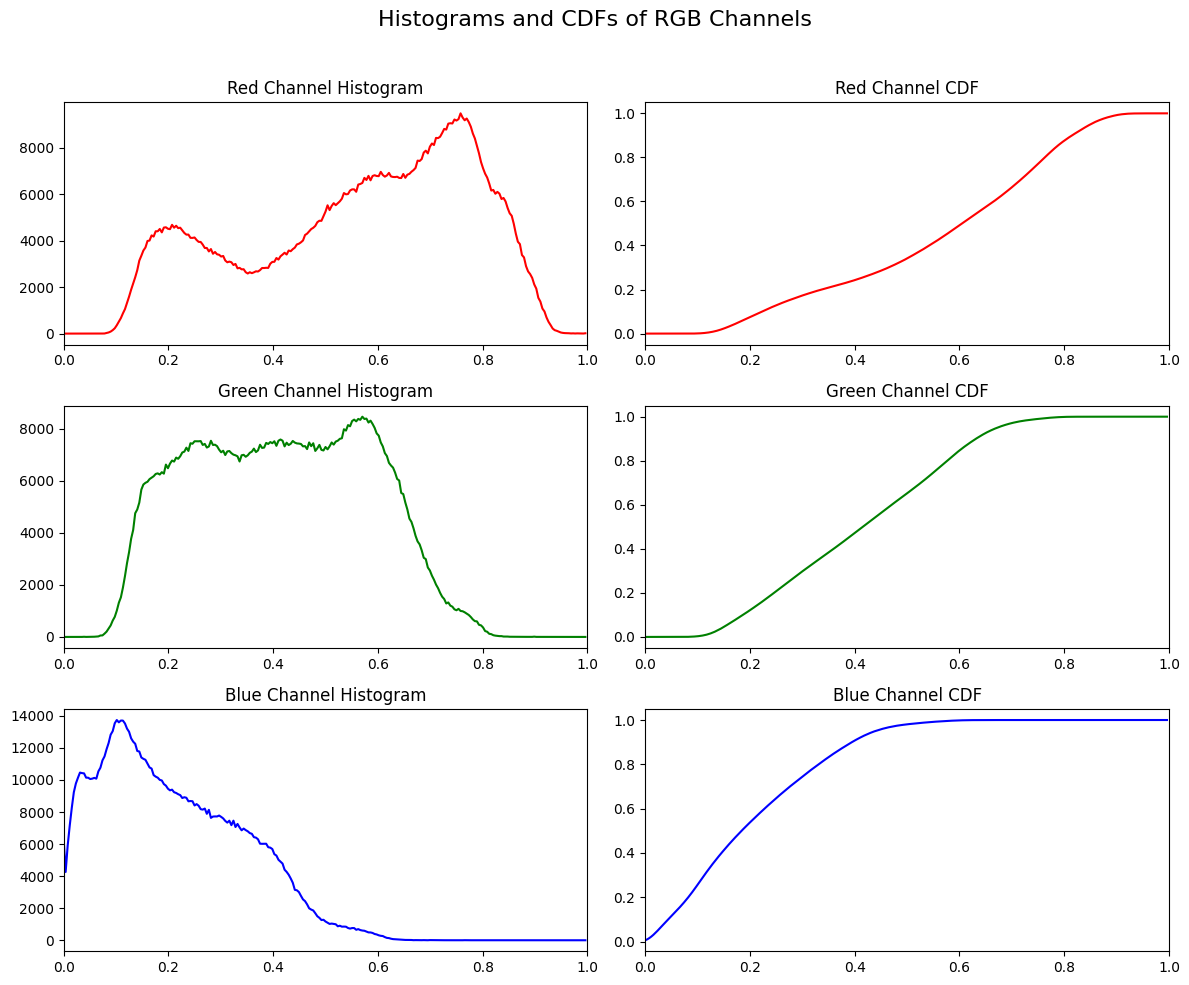

In [15]:
# Plot the image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### Begin solution
colors = ['Red', 'Green', 'Blue']
channel_indices = [0, 1, 2]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Histograms and CDFs of RGB Channels", fontsize=16)

for i, color in zip(channel_indices, colors):
    channel_data = I[:, :, i].flatten()

    hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
    axes[i, 0].plot(bins[:-1], hist, color=color.lower())
    axes[i, 0].set_title(f"{color} Channel Histogram")
    axes[i, 0].set_xlim(0, 1)

    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    axes[i, 1].plot(bins[:-1], cdf, color=color.lower())
    axes[i, 1].set_title(f"{color} Channel CDF")
    axes[i, 1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
### End solution

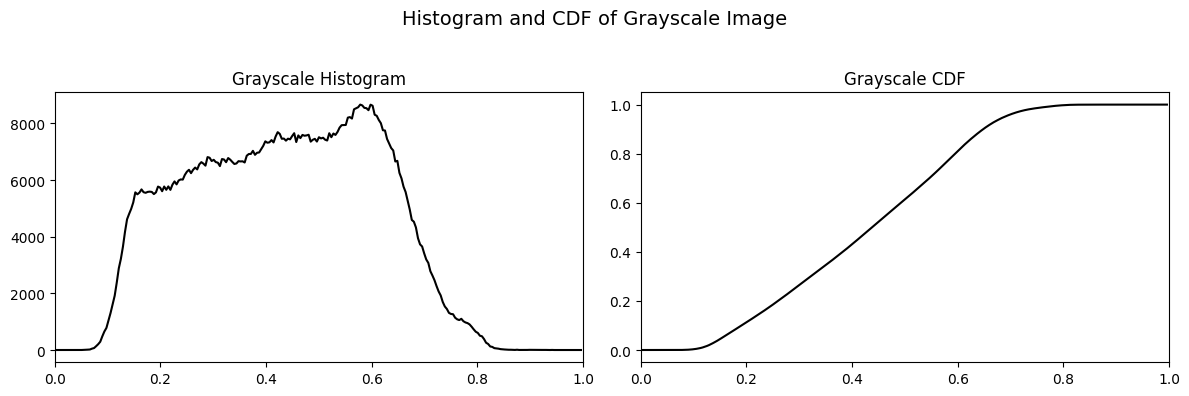

In [16]:
# Plot the grayscale image, I_gray, and its histogram + cdf

### Begin solution

channel_data = I_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("Grayscale Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("Grayscale CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### End solution

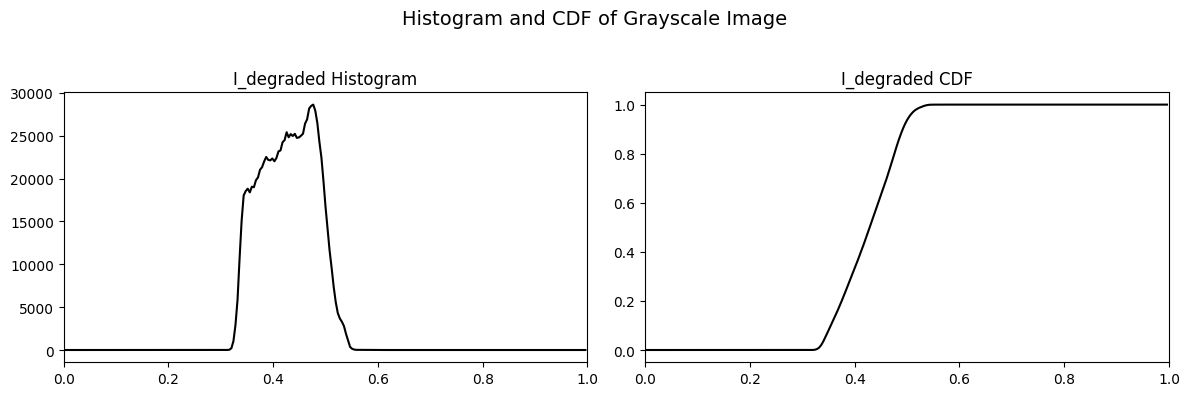

In [17]:
# Plot the degraded image, I_degraded, and its histogram + cdf

### Begin solution
channel_data = I_degraded.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_degraded Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_degraded CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### End solution

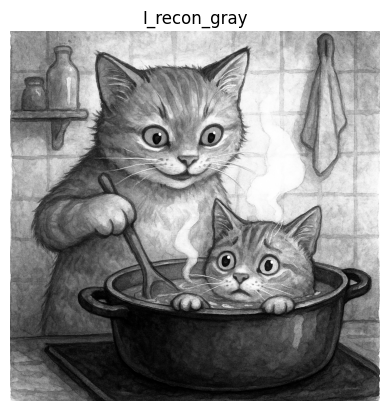

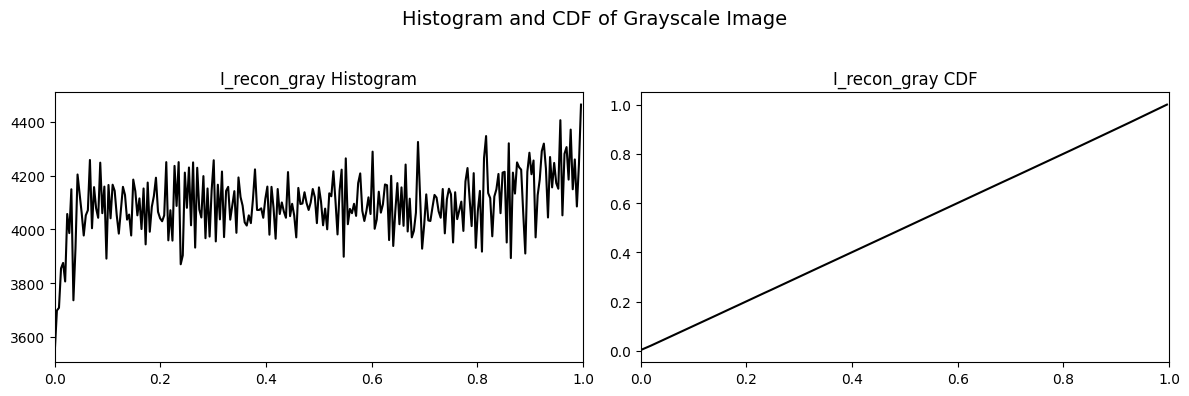

In [18]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray

I_recon_gray = exposure.equalize_hist(I_degraded)

### Write a code to display the I_recon_gray along with its histogram + CDF -
plt.imshow(I_recon_gray, cmap = 'grey')
plt.title("I_recon_gray")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

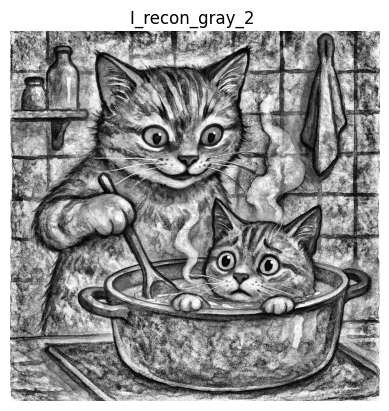

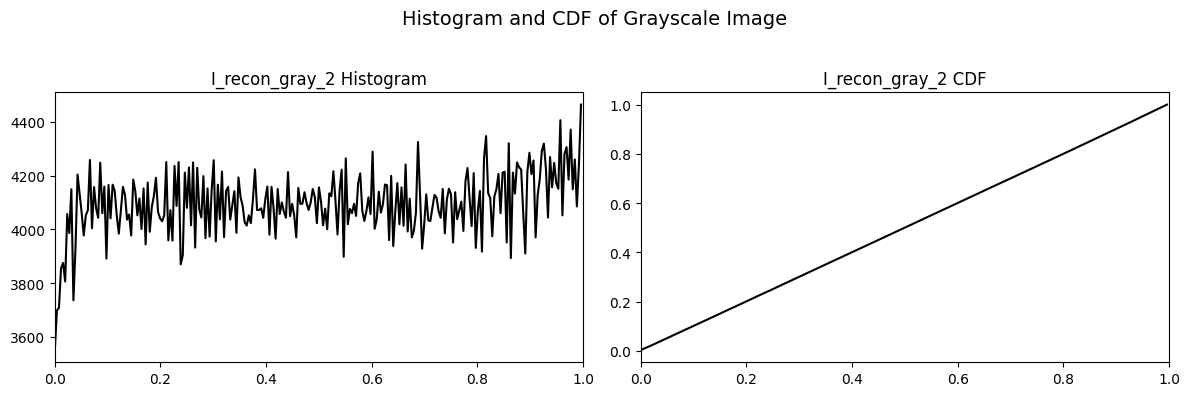

In [19]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=(64,64), clip_limit=0)

### Write a code to display the I_recon_gray_2 along with its histogram + CDF -
plt.imshow(I_recon_gray_2, cmap = 'grey')
plt.title("I_recon_gray_2 ")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray_2, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray_2 Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray_2 CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

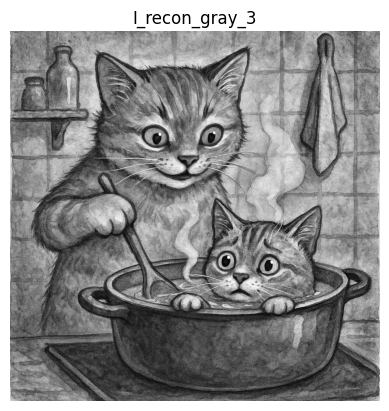

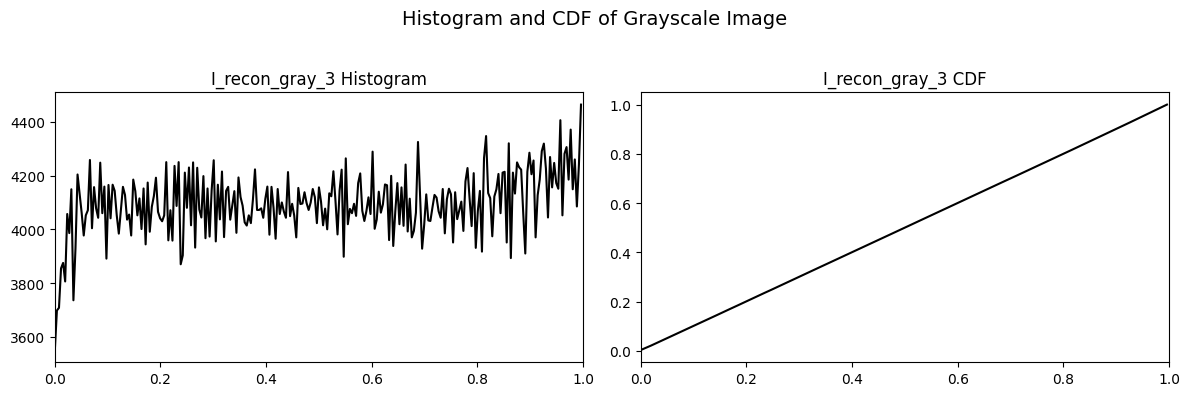

In [20]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_3
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(64,64), clip_limit=0.01)

### Write a code to display the I_recon_gray_3 along with its histogram + CDF -
plt.imshow(I_recon_gray_3, cmap = 'grey')
plt.title("I_recon_gray_3")
plt.axis('off');

hist, bins_hist = exposure.histogram(I_recon_gray_3, nbins=256, normalize=True)
channel_data = I_recon_gray.flatten()

hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
cdf = np.cumsum(hist)
cdf = cdf / cdf[-1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Histogram and CDF of Grayscale Image", fontsize=14)

axes[0].plot(bins[:-1], hist, color='black')
axes[0].set_title("I_recon_gray_3 Histogram")
axes[0].set_xlim(0, 1)

axes[1].plot(bins[:-1], cdf, color='black')
axes[1].set_title("I_recon_gray_3 CDF")
axes[1].set_xlim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
### Code ends

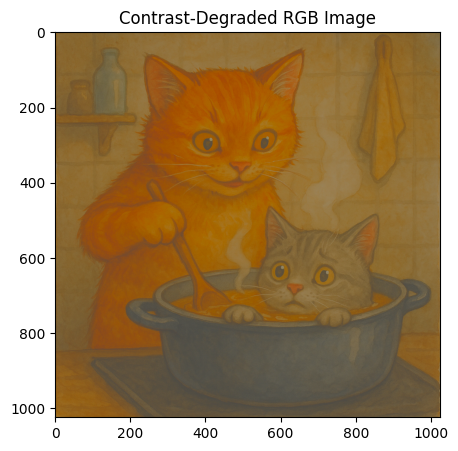

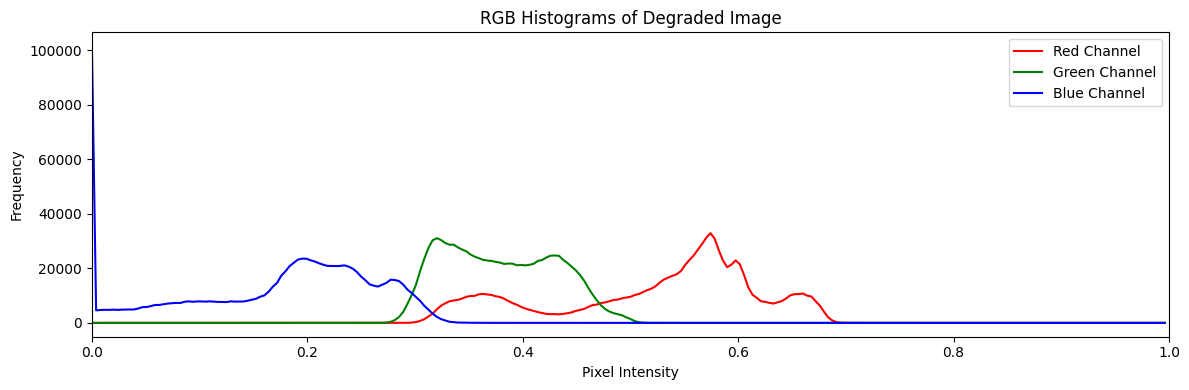

In [22]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space)
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# Re-import color module

I_lab = color.rgb2lab(I)
L = I_lab[:, :, 0] / 100.0
L_degraded = 0.3 + (L * 0.3)
I_lab[:, :, 0] = L_degraded * 100.0
I_rgb_degraded = color.lab2rgb(I_lab)

### Write a code to display the I_rgb_degraded along with its RGB histogram -
plt.figure(figsize=(6, 5))
plt.imshow(I_rgb_degraded)
plt.title("Contrast-Degraded RGB Image")
plt.show()
colors = ['Red', 'Green', 'Blue']
channel_indices = [0, 1, 2]

plt.figure(figsize=(12, 4))
for i, color_name in zip(channel_indices, colors):
    channel_data = I_rgb_degraded[:, :, i].flatten()
    hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
    plt.plot(bins[:-1], hist, color=color_name.lower(), label=f"{color_name} Channel")

plt.title("RGB Histograms of Degraded Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()
### Code ends

/tmp/ipython-input-1778076401.py:8: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 23 negative Z values that have been clipped to zero
  I_recon_color = color.lab2rgb(I_lab_degraded)


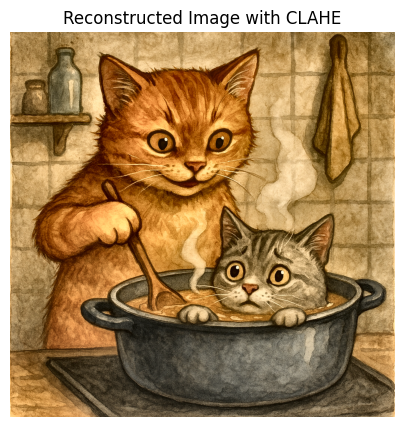

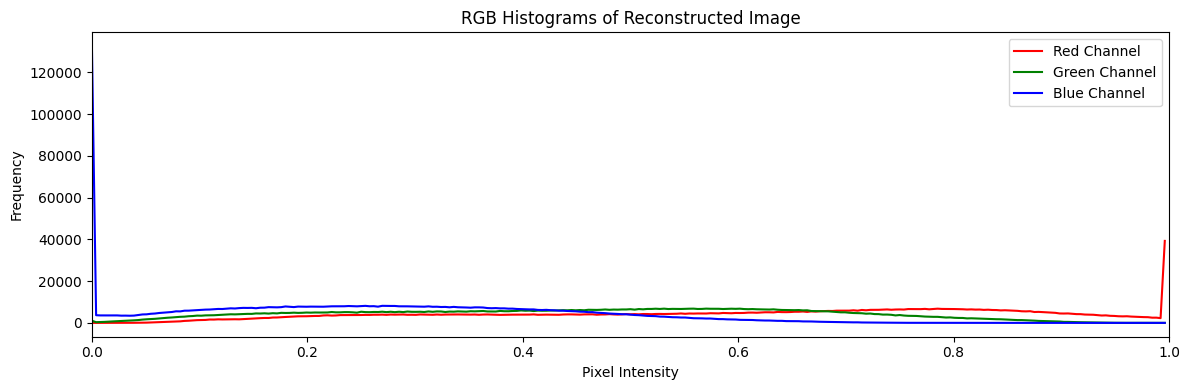

In [23]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
I_lab_degraded = color.rgb2lab(I_rgb_degraded)
L_degraded = I_lab_degraded[:, :, 0] / 100.0
L_equalized = exposure.equalize_adapthist(L_degraded, clip_limit=0.01)
I_lab_degraded[:, :, 0] = L_equalized * 100.0
I_recon_color = color.lab2rgb(I_lab_degraded)

### Write a code to display the I_recon_color along with its RGB histogram -
plt.figure(figsize=(6, 5))
plt.imshow(I_recon_color)
plt.title("Reconstructed Image with CLAHE")
plt.axis('off')
plt.show()

# Plot RGB histograms
colors = ['Red', 'Green', 'Blue']
channel_indices = [0, 1, 2]

plt.figure(figsize=(12, 4))
for i, color_name in zip(channel_indices, colors):
    channel_data = I_recon_color[:, :, i].flatten()
    hist, bins = np.histogram(channel_data, bins=256, range=(0, 1))
    plt.plot(bins[:-1], hist, color=color_name.lower(), label=f"{color_name} Channel")

plt.title("RGB Histograms of Reconstructed Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()
### Code ends

## Task 3 - Recovering QR code

You have been provided a badly damaged QR code - https://drive.google.com/file/d/1OcGWGwdL7wrhkwJMabtO7C9FXochD7t5/view?usp=drive_link

Your task is to recover it. Apply global histogram equalization, AHE and CLAHE on the image and see if you can read any version of the image.

❗For AHE and CLAHE, do not use a kernel size greater than 64.❗

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


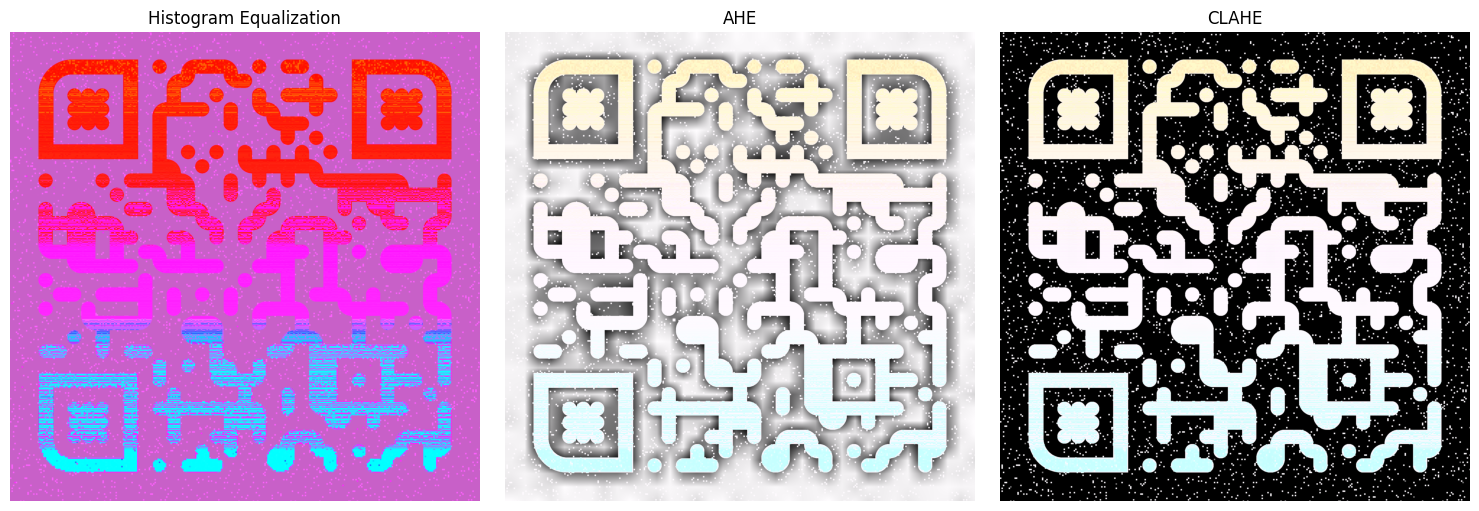

In [24]:
# Download the image from the drive link above
# Upload it to your current working directory in colab
# Load the image and save it under I variable

I = io.imread('/content/QR_code.png')

# Convert to LAB
I_lab = color.rgb2lab(I)
L = I_lab[:, :, 0] / 100.0
# Apply the processing methods -
I_histeq = exposure.equalize_hist(I)
I_ahe = exposure.equalize_adapthist(I, kernel_size=(64,64), clip_limit=0)
I_clahe = exposure.equalize_adapthist(I, kernel_size=(64,64), clip_limit=0.01)

### Display the processed images on a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Histogram Equalization', 'AHE', 'CLAHE']
images = [I_histeq, I_ahe, I_clahe]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
### Code ends

**Q1. Enter the link embedded in the QR code (if needed do a separate plot of each processed image) -**

*Answer -* https://youtube.com/shorts/7fTHD07Q9Pw?si=xANftwgmEUaRwJrd

**Q2. Which method(s) worked for you?**

*Answer -* CLAHE

**Q3. Why do you think the method(s) worked? Or why did the other method(s) fail to work?**

*Answer -* CLAHE worked best because it enhances local contrast in small regions of the image rather than the entire image globally

# Part 2 [15 Marks]

In this part of the assignment, you will work with filters.

In [37]:
import time
from scipy import signal
### If you need other dependencies import here -
from scipy.signal import fftconvolve
from scipy import ndimage
### Code ends

In [26]:
### If you need helper functions defined, define here -

def gaussian_kernel(stdev=1, size=10):
    x = np.linspace(-size // 2, size // 2, size)
    gaussian1dkernel = np.exp(-0.5 * (x / stdev)**2)
    gaussian1dkernel /= np.sum(gaussian1dkernel)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel) #outer represents outer product
    return kernel / np.sum(kernel)
### Code ends

## Task 1 - Direct vs FFT method correlation

Import another photograph taken by you (RGB) (`sample_2.jpeg`/`sample_2.jpg`) as a numpy array, save it in the varaible `I`.

A picture taken from your phone of any scenary/streets/building is better.

Remember -  your image name MUST be `sample_2.jpeg`/`sample_2.jpg`.

Make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

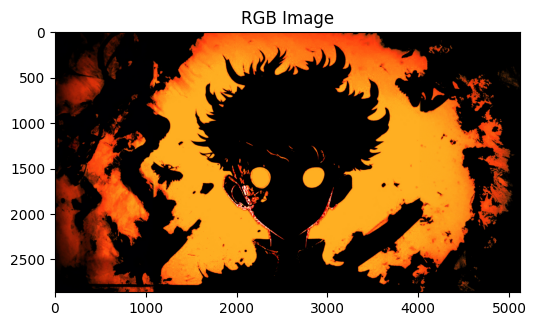

In [27]:
# Load the image
I = io.imread('/content/1353834.jpeg')

### Write a code to display the image -
plt.figure(figsize=(6, 5))
plt.imshow(I)
plt.title("RGB Image")
plt.show()
### Code ends

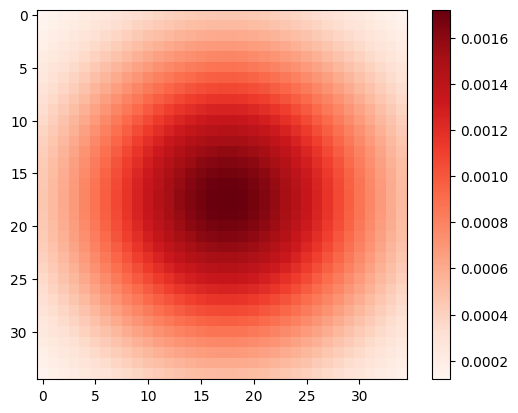

In [28]:
# Define a gaussian kernel of size (35, 35)
kernel = gaussian_kernel(11, 35)

### Write a code to display the kernel -
plt.imshow(kernel, cmap = "Reds")
plt.colorbar()
plt.show()
### Code ends

Now, apply `signal.correlate()` function to apply the kernel. Use `mode='same'` to preserve image dimensions. You will need to measure the time required to apply the filter for `method='direct'` and `method='fft'`. The next cell shows how to measure execution time -

In [ ]:
start_time = time.clock()

# Some function -
a = 1
b = 3
c = a + b
# Function ends

print("Time elapsed: ", time.clock() - start_time, "seconds")

Execution Time (Direct Convolution): 170.5762 seconds


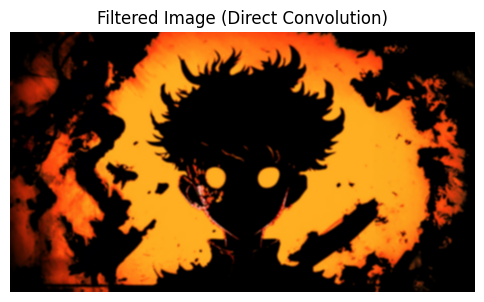

In [30]:
# Apply your kernel on your image using method='direct'
# Measure the execution time

start_time = time.time()
filetred_image_direct = np.zeros_like(I)
for c in range(3):  # RGB channels
    filetred_image_direct[:, :, c] = signal.convolve2d(I[:, :, c], kernel, mode='same', boundary='symm')

end_time = time.time()
print(f"Execution Time (Direct Convolution): {end_time - start_time:.4f} seconds")

plt.figure(figsize=(6, 5))
plt.imshow(filetred_image_direct.astype(np.uint8))
plt.title("Filtered Image (Direct Convolution)")
plt.axis('off')
plt.show()
### Time measurement wrapper starts

### Time measurement wrapper ends

Execution Time (FFT Convolution): 4.5713 seconds


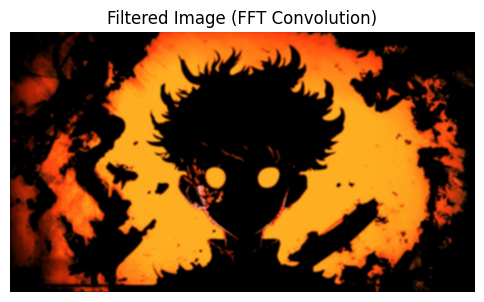

In [33]:
# Apply your kernel on your image using method='fft'
# Measure the execution time

### Time measurement wrapper starts
start_time = time.time()

filetred_image_fft = np.zeros_like(I)
for c in range(3):  # RGB channels
    filetred_image_fft[:, :, c] = signal.fftconvolve(I[:, :, c], kernel, mode='same')

end_time = time.time()
print(f"Execution Time (FFT Convolution): {end_time - start_time:.4f} seconds")

plt.figure(figsize=(6, 5))
plt.imshow(filetred_image_fft.astype(np.uint8))
plt.title("Filtered Image (FFT Convolution)")
plt.axis('off')
plt.show()
### Time measurement wrapper ends

**Q1. Which method was faster?**

*Answer -* FFT Convolution

**Q2. Provide reasoning -**

*Reasoning -* Because it leverages the Fast Fourier Transform to convert convolution from the spatial domain to the frequency domain

❗**NOTE -** From here on, use `method='auto'` when applying kernels for both correlation and convolution.❗

## Task 2 - Correlation vs Convolution

For convolution, use `signal.convolve()`. Maintain image dimensions for filtering.

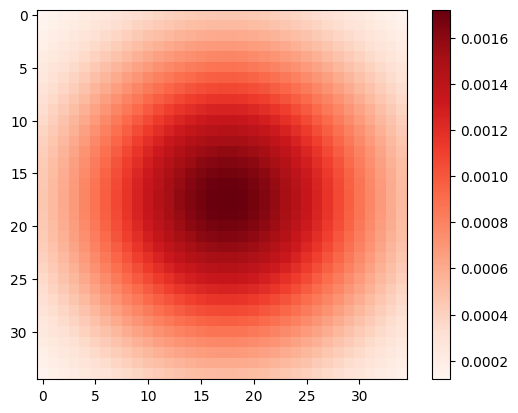

In [43]:
# Define any symmetric kernel of size (105, 105)
kernel_symmetric = gaussian_kernel(1, 105)

### Write a code to display the kernel -
plt.imshow(kernel, cmap = "Reds")
plt.colorbar()
plt.show()
### Code ends

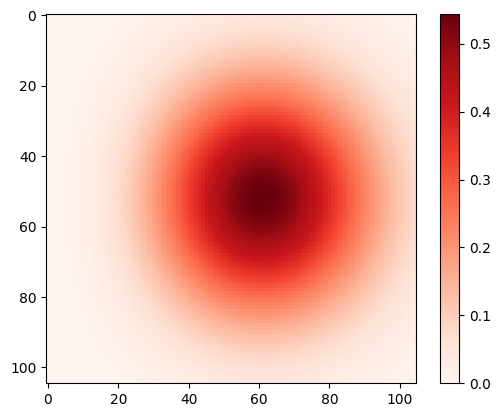

In [35]:
# Define any asymmetric kernel of size (105, 105)
x = np.linspace(0, 1, 105)
y = np.linspace(0, 1, 105)
X, Y = np.meshgrid(x, y)
kernel_asymmetric = X * np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / 0.1)

### Write a code to display the kernel -
plt.imshow(kernel_asymmetric, cmap = "Reds")
plt.colorbar()
plt.show()
### Code ends

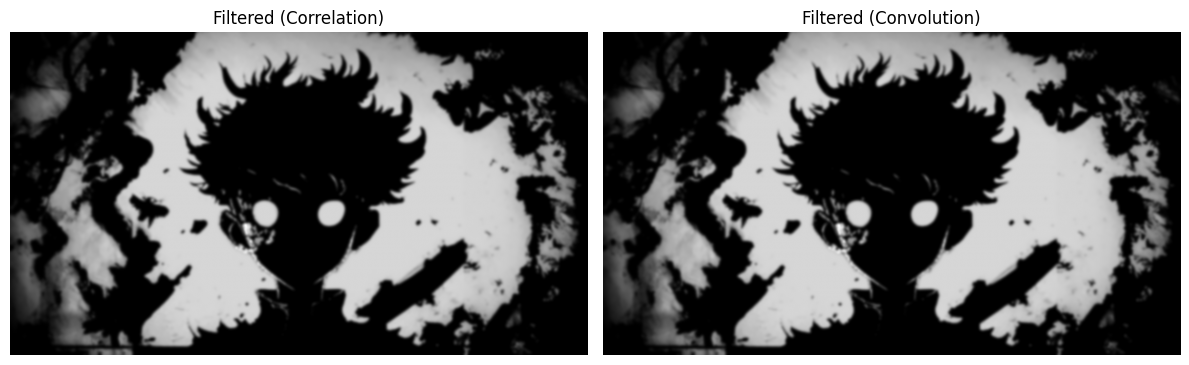

In [41]:
# Filter the image with the symmetric kernel
if I.ndim == 3:
    I_gray = np.mean(I, axis=2)
else:
    I_gray = I

# Filter using correlation
filtered_image_symmetric_corr = ndimage.correlate(I_gray, kernel_symmetric, mode='reflect')

# Filter using convolution
filtered_image_symmetric_conv = ndimage.convolve(I_gray, kernel_symmetric, mode='reflect')



### Write a code to display the asymmetric filtered images side by side in a subplot -
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_symmetric_corr, cmap='gray')
plt.title("Filtered (Correlation)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_symmetric_conv, cmap='gray')
plt.title("Filtered (Convolution)")
plt.axis('off')

plt.tight_layout()
plt.show()

### Code ends

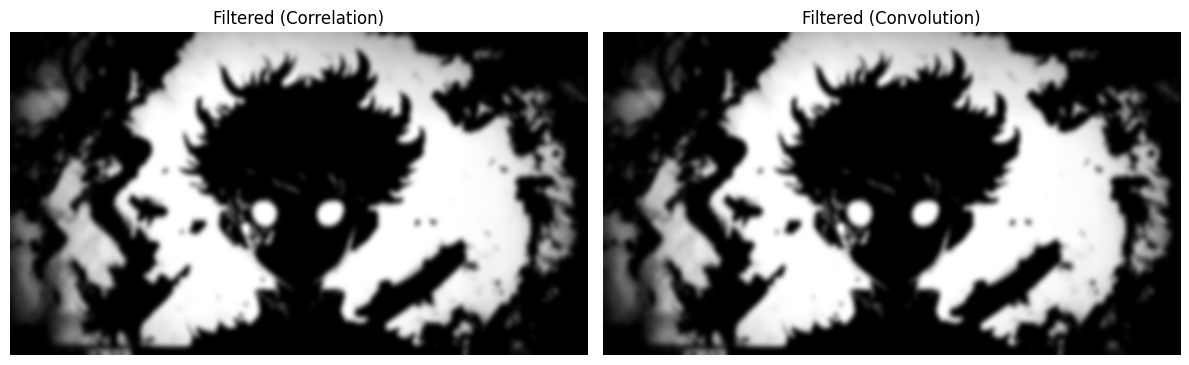

In [42]:
# Filter the image with the asymmetric kernel


# Filter using correlation
filtered_image_symmetric_corr = ndimage.correlate(I_gray, kernel_asymmetric, mode='reflect')

# Filter using convolution
filtered_image_symmetric_conv = ndimage.convolve(I_gray, kernel_asymmetric, mode='reflect')



### Write a code to display the asymmetric filtered images side by side in a subplot -
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_symmetric_corr, cmap='gray')
plt.title("Filtered (Correlation)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_symmetric_conv, cmap='gray')
plt.title("Filtered (Convolution)")
plt.axis('off')

plt.tight_layout()
plt.show()
### Code ends

**Q1. Are the outputs for correlation and convolution same?**

*Answer -* Almost Same

**Q2. Provide reasoning -**

*Answer -* for symmetric kernel, flipping has no effect—so convolution and correlation produce nearly identical results. However, for asymmetric kernel, the flipping in convolution can lead to noticeable differences in edge orientation or intensity.

## Task 3 - Finding edges

Load this image - https://drive.google.com/file/d/1i8nJke1OJ7DMj8yzi91Sm6TiuGEwRl0R/view?usp=sharing

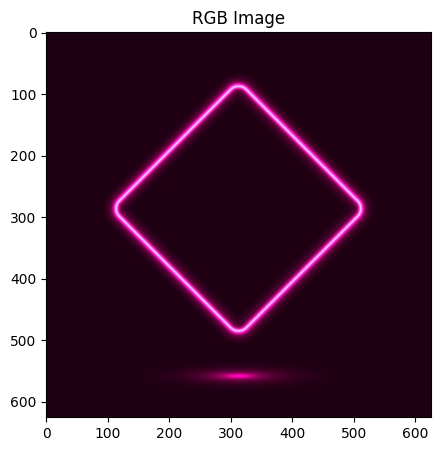

In [44]:
# Download the image from the drive link above
# Upload it to your current working directory in colab
# Load the image and save it under I variable
I = io.imread('/content/diamond.jpg')

### Write a code to display the image -
plt.figure(figsize=(6, 5))
plt.imshow(I)
plt.title("RGB Image")
plt.show()
### Code ends

The diamond in the image has two parallel sides. You will need to come up with two $3\times3$ kernels to detect the two sets of parallel sides. Your filters should not detect all the four sides at once.

In [45]:
# Define the 2 custom kernels by replacing the "?"s with your values
# After finding out the values, uncomment the next few lines of code in this cell

kernel_1 = np.array([[0, -1, -2],
                     [1, 0, -1],
                     [2, 1, 0]])

kernel_2 = np.array([[2, 1, 0],
                     [1, 0, -1],
                     [0, -1, -2]])

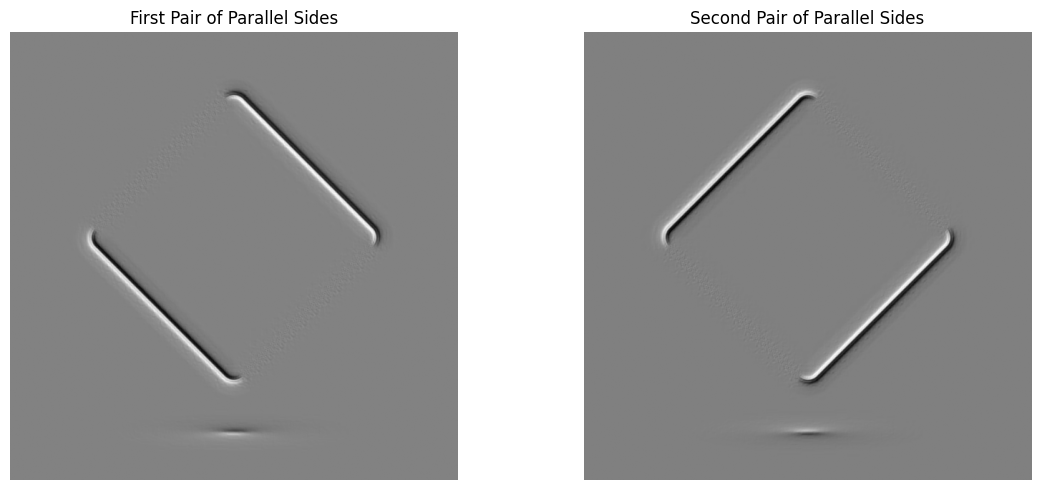

In [46]:
if I.ndim == 3:
    I_gray = np.mean(I, axis=2)
else:
    I_gray = I

# Apply kernel_1 on I and save it as first_pair
first_pair = ndimage.convolve(I_gray, kernel_1, mode='reflect')

# Apply kernel_2 on I and save it as second_pair
second_pair = ndimage.convolve(I_gray, kernel_2, mode='reflect')

### Write a code to display the two filtered images side by side in a subplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(first_pair, cmap='gray')
plt.title("First Pair of Parallel Sides")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(second_pair, cmap='gray')
plt.title("Second Pair of Parallel Sides")
plt.axis('off')

plt.tight_layout()
plt.show()
### Code ends

**Q1. Which filters did you use and why?**

*Answer -* Robinson Cross. Because the diamond got diagonal lines.

**Q2. How do your coefficients help in detecting the edges?**

*Answer -* By emphasizing intensity changes along specific diagonal directions.

**Q3. Are your kernels unique or there can be other kernels which can accomplish the same task?**

*Answer -* These kernels are not unique. There are many possible kernels that can detect the same diagonal edges I think Laplacian operator can accomplish the same task.